<a href="https://colab.research.google.com/github/soumyajoykundu/Applied-Machine-Learning-2025/blob/main/prepare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **AML Assignment 01 : Prototype**
#### **Task : Build a prototype for sms spam classification**


- Name: Soumyajoy Kundu
- Roll No: MDS202349

----


* In `prepare.ipynb` write the functions to,
    * load the data from a given file path
    * preprocess the data (if needed)
    * split the data into train/validation/test
    * store the splits at train.csv/validation.csv/test.csv

*Notes*:
* You may download sms spam data from https://archive.ics.uci.edu/ml/datasets/sms+spam+collection
* You may refer to https://radimrehurek.com/data_science_python/ for building a prototype

----

### Importing Libraries

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv

* Converting the input file to CSV format for further processing

In [1]:
# Read the text file and process the data
input_file = "/content/SMSSpamCollection"
output_file = "/content/SMSSpamCollection.csv"

with open(input_file, "r", encoding="utf-8") as infile, open(output_file, "w", encoding="utf-8", newline="") as outfile:
    writer = csv.writer(outfile)

    # Write the header
    writer.writerow(["Label", "Message"])

    # Read each line and split it into label and message
    for line in infile:
        try:
            # Split only on the first space to handle messages with spaces
            label, message = line.strip().split("\t", 1)
            writer.writerow([label, message])
        except ValueError:
            # Skip lines that don't match the format
            continue

print(f"Conversion complete! The CSV file is saved as {output_file}.")

Conversion complete! The CSV file is saved as /content/SMSSpamCollection.csv.


In [15]:
data = pd.read_csv("/content/SMSSpamCollection.csv")
data

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...
5570,ham,Will ü b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


* This file contains a collection of more than 5 thousand SMS phone messages

In [6]:
messages = [line.rstrip() for line in open('/content/SMSSpamCollection')]
print(len(messages))

5574


* Print the first ten messages in this SMS corpus

In [8]:
for message_no, message in enumerate(messages[:10]):
    print(message_no, message)

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

* We can also view aggregate statistics easily:

In [10]:
data.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4827   4518                             Sorry, I'll call later   30
spam      747    642  Please call our customer service representativ...    4

*
How long are the messages?

In [40]:
data['length'] = data['Message'].map(lambda text: len(text))
print(data.head())

  Label                                            Message  length
0   ham  Go until jurong point, crazy.. Available only ...     111
1   ham                      Ok lar... Joking wif u oni...      29
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
3   ham  U dun say so early hor... U c already then say...      49
4   ham  Nah I don't think he goes to usf, he lives aro...      61


* Difference in message length between spam and ham

array([<Axes: title={'center': 'ham'}>, <Axes: title={'center': 'spam'}>],
      dtype=object)

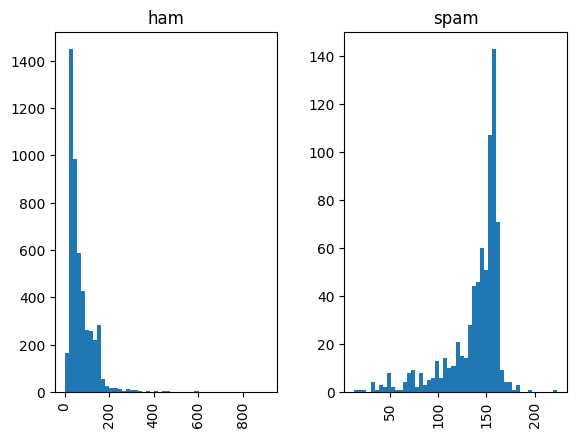

In [42]:
data.hist(column='length', by='Label', bins=50)

* Composition of both spam and ham sms in the data

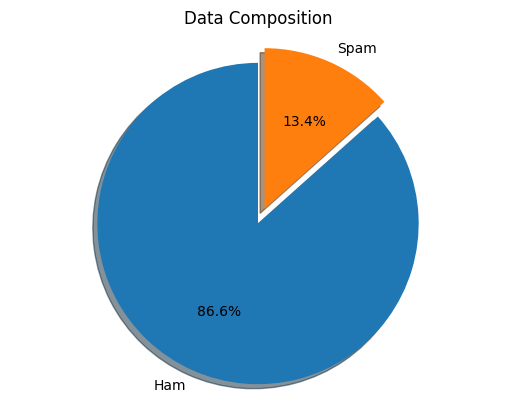

In [33]:
# Count the occurrences of 'ham' and 'spam'
ham_count = data['Label'].value_counts()['ham']
spam_count = data['Label'].value_counts()['spam']

# Create the pie chart
labels = ['Ham', 'Spam']
sizes = [ham_count, spam_count]
explode = (0.1, 0)

fig, ax = plt.subplots()
ax.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Data Composition')
plt.show()

* The pie chart shows that the `Ham` class constitutes 86.6% of the data, while the `Spam` class makes up only 13.4%.
* A significant class imbalance like this can bias machine learning models toward the majority class (Ham), resulting in poor performance on the minority class (Spam).

### Functions to Prepare Data

#### Load the data from a given file path


In [ ]:
from sklearn.model_selection import train_test_split

def load_data(file_path):
    """
    Load SMS Spam Collection data from the given file path.
    """
    data = pd.read_csv(file_path, sep='\t', header=None, names=['Label', 'Message'])
    return data

#### Preprocess the data
- Mapping the labels to binary values

In [ ]:
def preprocess_data(data):
    """
    Preprocess the data: map labels to binary values.
    """
    data['Label'] = data['Label'].map({'ham': 0, 'spam': 1})
    return data

#### Split the data
* `train_data`
* `validation_data`
* `test_data`

First the whole data is randomly spliited using stratification for class imbalannce into two sets one of which is test set and the other set is further divided into train set and validation set, ensuring a major proportion of data is used for training and rest for fine-tuning and finally the test set is used for evaluating.

In [ ]:
def split_data(data, test_size=0.2, validation_size=0.2):
    """
    Split the data into train, validation, and test sets.
    """
    train_data, test_data = train_test_split(data, test_size=test_size, random_state=42, stratify=data['Label'])
    train_data, validation_data = train_test_split(train_data, test_size=validation_size, random_state=42, stratify=train_data['Label'])
    return train_data, validation_data, test_data

#### Store the splits
* train.csv
* validation.csv
* test.csv


In [ ]:
def save_splits(train_data, validation_data, test_data):
    """
    Save train, validation, and test data to separate CSV files.
    """
    train_data.to_csv('train.csv', index=False)
    validation_data.to_csv('validation.csv', index=False)
    test_data.to_csv('test.csv', index=False)

In [ ]:
file_path = "/content/SMSSpamCollection"

# Loading the Data
data = load_data(file_path)

# Pre-processing the data
data = preprocess_data(data)

# Splitting it into train, validation and test sets and finally saving in different csv files
train_data, validation_data, test_data = split_data(data)
save_splits(train_data, validation_data, test_data)